In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [7]:
df = pd.read_excel('CafeDataset.xlsx')

In [11]:
df

,Año,Mes,País destino,Nombre exportador,Sacos de 70 kg. equivalente real Exportados,Sacos de 60 Kg. Exportados,Valor Factura (USD)*
0,2017,1,Alemania,A LAUMAYER Y COMPAÑIA EXPORTADORES,4691,5471,1133799.64
1,2017,1,Alemania,ALTAMIRA SUPREMO S.A.S.,825,962,150000.00
2,2017,1,Alemania,BANCA EXPORTADORA S.A BANEXPORT,275,321,80000.00
3,2017,1,Alemania,C. I. KYOTO LOHAS BEANS S.A.S,271,316,96744.25
4,2017,1,Alemania,CAFE COLSUAVES S.A.S,300,350,64500.00
...,...,...,...,...,...,...,...
41230,2024,9,Vietnam,OLAM AGRO COLOMBIA S.A.S,1142,1333,280000.00
41231,2024,9,Curaçao,EXPOCOSURCA S.A. C.I.,171,200,96462.29
41232,2024,9,Curaçao,INDUSTRIA COLOMBIANA DE CAFÉ S.A.S.,218,254,113117.68
41233,2024,9,Mauricio (Isl.),PROMOTORA DE CAFE COLOMBIA S.A.,65,77,68602.07


In [13]:
print("Información básica del DataFrame:")
print(df.info())

Información básica del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41235 entries, 0 to 41234
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Año                                          41235 non-null  int64  
 1   Mes                                          41235 non-null  int64  
 2   País destino                                 41235 non-null  object 
 3   Nombre exportador                            41235 non-null  object 
 4   Sacos de 70 kg. equivalente real Exportados  41235 non-null  int64  
 5   Sacos de 60 Kg. Exportados                   41235 non-null  int64  
 6   Valor Factura (USD)*                         41233 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 2.2+ MB
None


In [15]:
descripcion_estadistica = df.describe()

print("\nMedidas estadísticas descriptivas para columnas numéricas:")
print(descripcion_estadistica)


Medidas estadísticas descriptivas para columnas numéricas:
                Año           Mes  \
count  41235.000000  41235.000000   
mean    2020.510440      6.439893   
std        2.266737      3.434119   
min     2017.000000      1.000000   
25%     2019.000000      3.000000   
50%     2020.000000      6.000000   
75%     2023.000000      9.000000   
max     2024.000000     12.000000   

       Sacos de 70 kg. equivalente real Exportados  \
count                                 41235.000000   
mean                                   1980.881314   
std                                    5237.189912   
min                                       0.000000   
25%                                     259.000000   
50%                                     542.000000   
75%                                    1400.000000   
max                                   81319.000000   

       Sacos de 60 Kg. Exportados  Valor Factura (USD)*  
count                41235.000000          4.123300e+04  
mea

In [51]:
maximos = descripcion_estadistica.loc['max', :]
print("Valores máximos:\n", maximos)

Valores máximos:
 Año                                                2024.00
Mes                                                  12.00
Sacos de 70 kg. equivalente real Exportados       81319.00
Sacos de 60 Kg. Exportados                        94864.00
Valor Factura (USD)*                           34055830.69
Name: max, dtype: float64


In [61]:
columnas_numericas = ['Valor Factura (USD)*'] 
medias = df[columnas_numericas].mean()
print("Medias de las columnas numéricas especificadas:\n", medias)

Medias de las columnas numéricas especificadas:
 Valor Factura (USD)*    550965.344301
dtype: float64


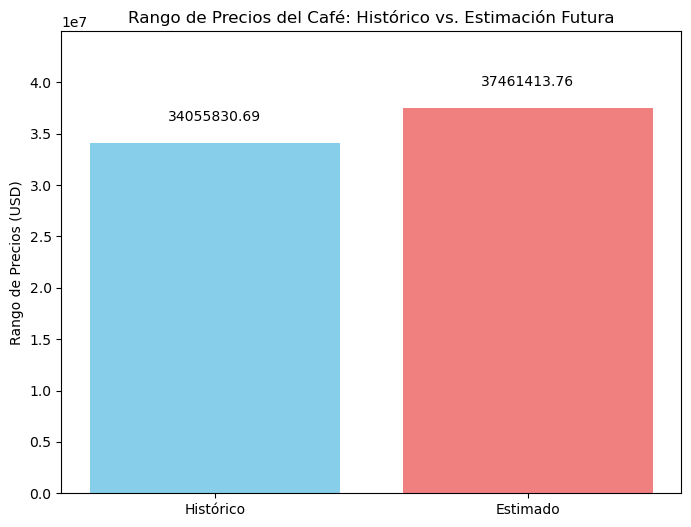


Estimación del rango futuro:
Rango histórico: 34055830.69
Rango estimado: 37461413.76


In [63]:
rango_historico = maximo - minimo
rango_futuro_estimado = rango_historico * 1.1  # Ejemplo: 10% más que el histórico


# Datos para la gráfica
rangos = {'Histórico': rango_historico, 'Estimado': rango_futuro_estimado}
etiquetas = list(rangos.keys())
valores = list(rangos.values())

# Crea la gráfica
plt.figure(figsize=(8, 6))
plt.bar(etiquetas, valores, color=['skyblue', 'lightcoral'])
plt.ylabel('Rango de Precios (USD)')
plt.title('Rango de Precios del Café: Histórico vs. Estimación Futura')
plt.ylim(0, max(valores) * 1.2)  # Ajusta el límite superior del eje y

# Agrega etiquetas con los valores
for i, v in enumerate(valores):
    plt.text(etiquetas[i], v + (max(valores) * 0.05), f'{v:.2f}', ha='center', va='bottom')

# Muestra la gráfica
plt.show()

# Imprime las estimaciones
print(f"\nEstimación del rango futuro:")
print(f"Rango histórico: {rango_historico:.2f}")
print(f"Rango estimado: {rango_futuro_estimado:.2f}")

In [77]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


C:\Users\ORICO\AppData\Local\Temp\ipykernel_11996\3526555103.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=años, y=rangos, palette=colores, edgecolor='black', linewidth=1)


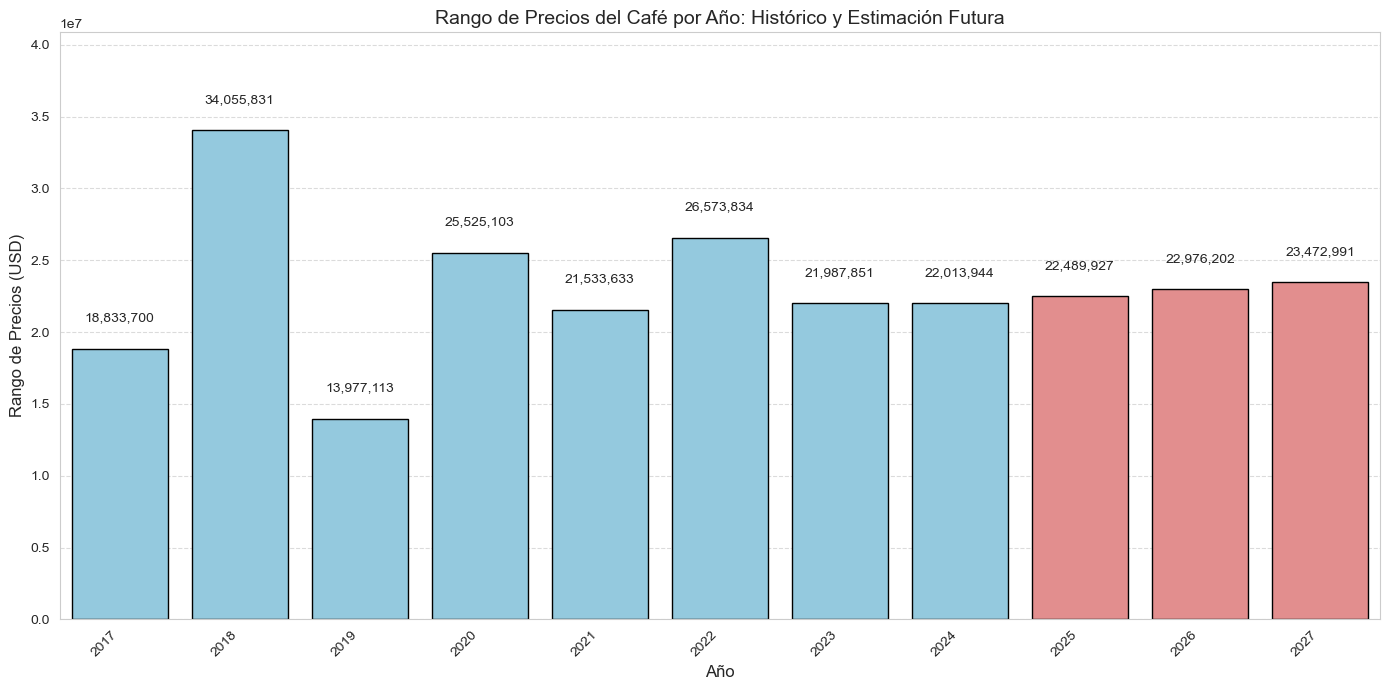

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # Carga del DataFrame
    df = pd.read_excel("CafeDataset.xlsx")

    # Verifica que las columnas necesarias existan
    if not all(col in df.columns for col in ['Año', 'Valor Factura (USD)*']):
        raise ValueError("Las columnas 'Año' o 'Valor Factura (USD)*' no existen en el DataFrame.")

    # Agrupa los datos por año y calcula el rango de precios
    rangos_por_año = df.groupby('Año')['Valor Factura (USD)*'].agg(['min', 'max'])
    rangos_por_año['rango'] = rangos_por_año['max'] - rangos_por_año['min']

    # Calcula el crecimiento promedio (manejo de errores)
    try:
        crecimiento_promedio = (rangos_por_año['rango'].iloc[-3:].mean() / rangos_por_año['rango'].iloc[-4:].mean()) - 1
    except (ZeroDivisionError, IndexError):
        print("Error: No hay suficientes datos para calcular el crecimiento promedio. Se usará un crecimiento del 0%.")
        crecimiento_promedio = 0

    # Estimaciones para años futuros
    años_futuros = [2025, 2026, 2027]
    rangos_futuros = []
    for año in años_futuros:
        ultimo_rango = rangos_por_año['rango'].iloc[-1]
        rango_futuro = ultimo_rango * (1 + crecimiento_promedio)
        rangos_futuros.append(rango_futuro)
        rangos_por_año.loc[año] = [0, 0, rango_futuro]

    # Prepara los datos para la gráfica
    años = list(rangos_por_año.index)
    rangos = list(rangos_por_año['rango'])
    colores = ['skyblue'] * (len(años) - len(años_futuros)) + ['lightcoral'] * len(años_futuros)

    # Crea la gráfica usando Seaborn
    plt.figure(figsize=(14, 7))
    sns.set_style("whitegrid")
    sns.barplot(x=años, y=rangos, palette=colores, edgecolor='black', linewidth=1)

    plt.xlabel('Año', fontsize=12)
    plt.ylabel('Rango de Precios (USD)', fontsize=12)
    plt.title('Rango de Precios del Café por Año: Histórico y Estimación Futura', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, max(rangos) * 1.2)

    # Etiquetas de valor en la gráfica
    for i, v in enumerate(rangos):
        plt.text(i, v + (max(rangos) * 0.05), f'{v:,.0f}', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("Error: No se encontró el archivo 'CafeDataset.xlsx'.")
except ValueError as e:
    print(f"Error: {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

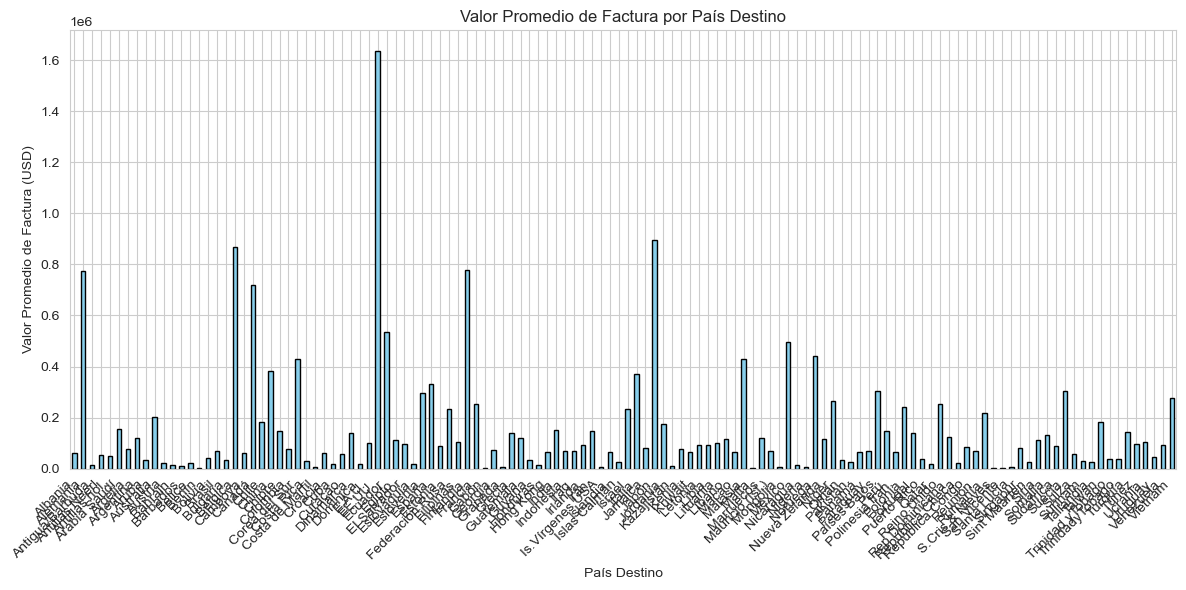

C:\Users\ORICO\AppData\Local\Temp\ipykernel_11996\3325941642.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='País destino', y='Valor Factura (USD)*', data=df, palette='pastel')


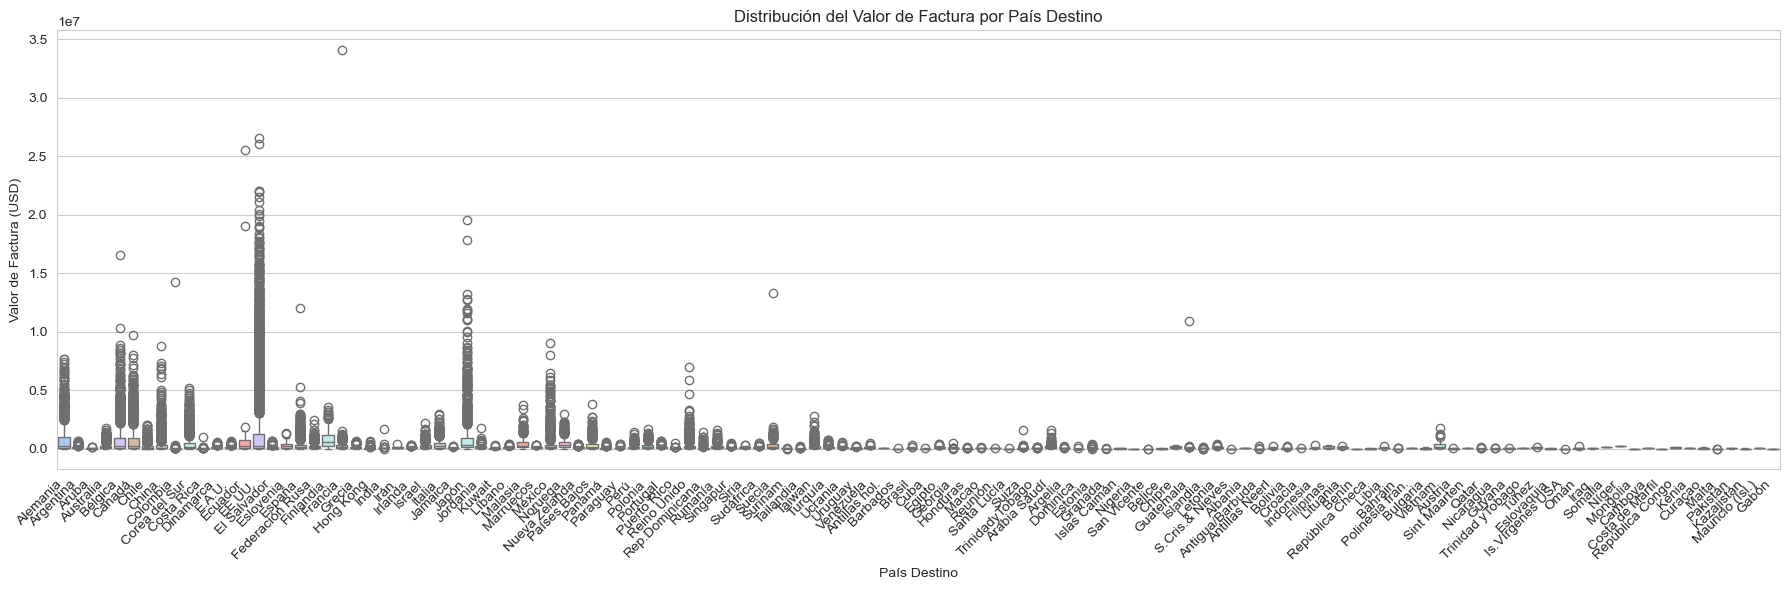

In [93]:
# Calcula la media del valor de la factura por país
media_por_pais = df.groupby('País destino')['Valor Factura (USD)*'].mean()

# Crea la gráfica de barras
plt.figure(figsize=(12, 6))
media_por_pais.plot(kind='bar', color='skyblue', edgecolor='black', linewidth=1)
plt.xlabel('País Destino')
plt.ylabel('Valor Promedio de Factura (USD)')
plt.title('Valor Promedio de Factura por País Destino')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Crea la gráfica de caja y bigotes
plt.figure(figsize=(18, 6))
sns.boxplot(x='País destino', y='Valor Factura (USD)*', data=df, palette='pastel')
plt.xlabel('País Destino')
plt.ylabel('Valor de Factura (USD)')
plt.title('Distribución del Valor de Factura por País Destino')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

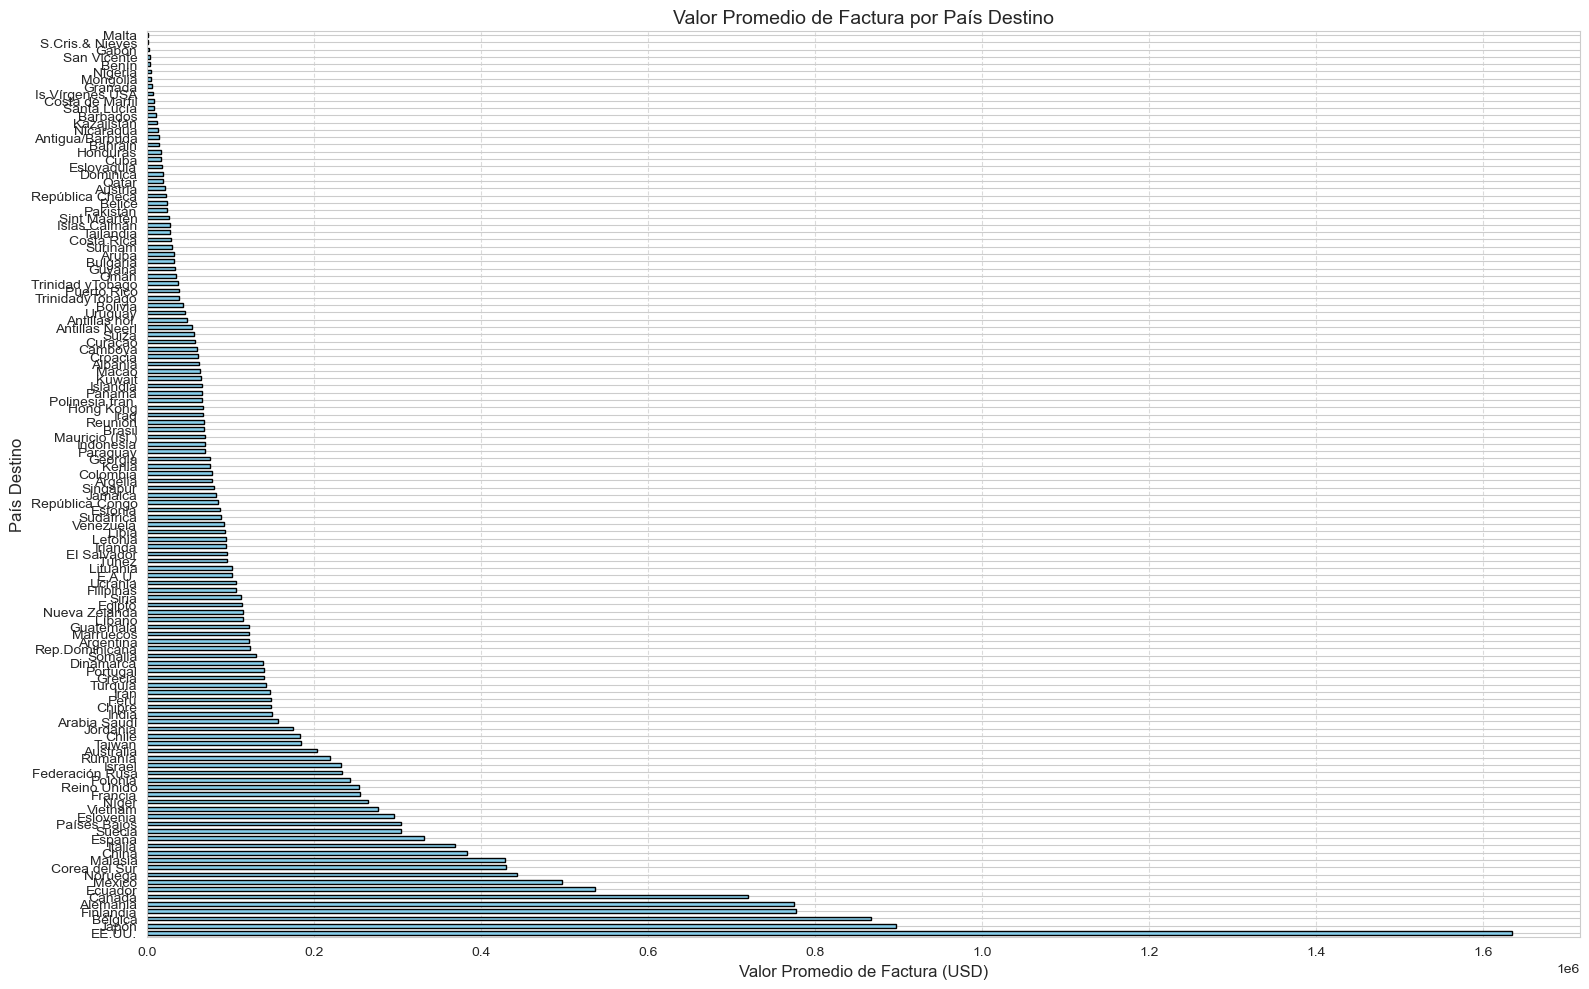

C:\Users\ORICO\AppData\Local\Temp\ipykernel_11996\1347045763.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='País destino', y='Valor Factura (USD)*', data=df, palette='pastel')


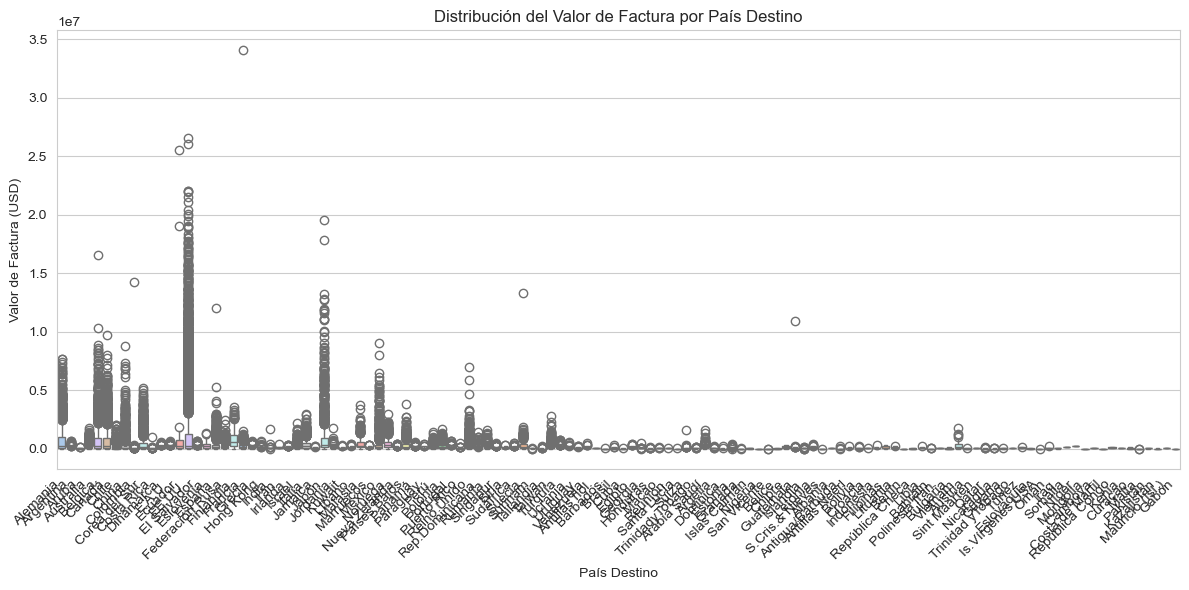

In [95]:
# Calcula la media del valor de la factura por país
media_por_pais = df.groupby('País destino')['Valor Factura (USD)*'].mean()

# Ordena los datos para que la gráfica sea más fácil de leer
media_por_pais = media_por_pais.sort_values(ascending=False)

# Crea la gráfica de barras (horizontal para mejor legibilidad)
plt.figure(figsize=(16, 10))  # Aumenta el tamaño de la gráfica
media_por_pais.plot(kind='barh', color='skyblue', edgecolor='black', linewidth=1)
plt.xlabel('Valor Promedio de Factura (USD)', fontsize=12)
plt.ylabel('País Destino', fontsize=12)
plt.title('Valor Promedio de Factura por País Destino', fontsize=14)
plt.yticks(fontsize=10) #Ajusta el tamaño de la fuente de las etiquetas del eje y
plt.grid(axis='x', linestyle='--', alpha=0.7) #Grilla solo en el eje x

plt.tight_layout()
plt.show()


# Crea la gráfica de caja y bigotes (opcional)
plt.figure(figsize=(12, 6))
sns.boxplot(x='País destino', y='Valor Factura (USD)*', data=df, palette='pastel')
plt.xlabel('País Destino')
plt.ylabel('Valor de Factura (USD)')
plt.title('Distribución del Valor de Factura por País Destino')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\ORICO\AppData\Local\Temp\ipykernel_11996\1015437600.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_paises.values, y=top_20_paises.index, palette='Blues_r', edgecolor='black', linewidth=1) #Paleta de colores invertida para mejor contraste.


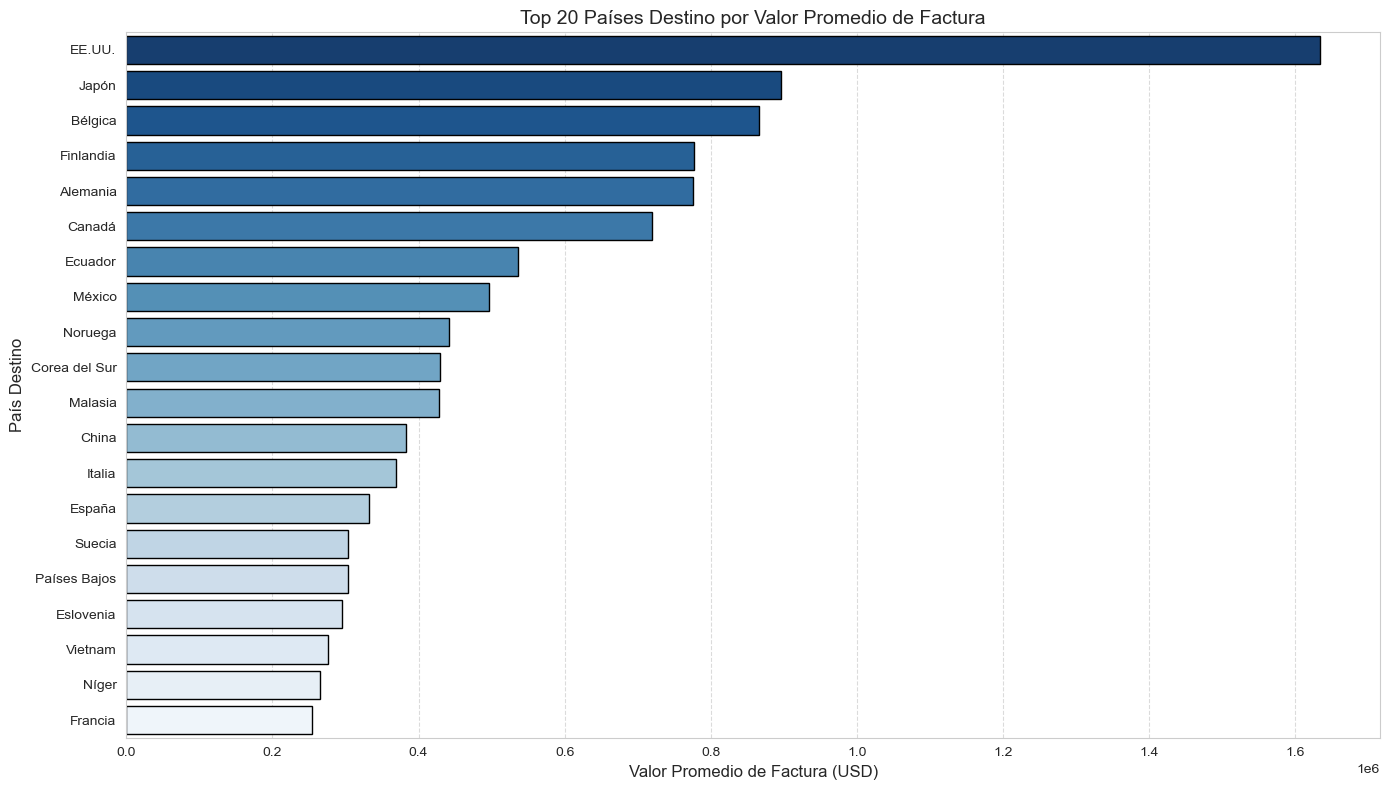

In [97]:
try:
    # Carga del DataFrame
    df = pd.read_excel("CafeDataset.xlsx")

    # Verifica si la columna existe
    if not all(col in df.columns for col in ['País destino', 'Valor Factura (USD)*']):
        raise ValueError("Las columnas 'País destino' o 'Valor Factura (USD)*' no existen.")

    # Calcula la media del valor de la factura por país
    media_por_pais = df.groupby('País destino')['Valor Factura (USD)*'].mean()

    # Ordena los datos y selecciona el top 20
    top_20_paises = media_por_pais.sort_values(ascending=False).head(20)

    # Crea la gráfica de barras horizontal
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")
    sns.barplot(x=top_20_paises.values, y=top_20_paises.index, palette='Blues_r', edgecolor='black', linewidth=1) #Paleta de colores invertida para mejor contraste.

    plt.xlabel('Valor Promedio de Factura (USD)', fontsize=12)
    plt.ylabel('País Destino', fontsize=12)
    plt.title('Top 20 Países Destino por Valor Promedio de Factura', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=10)
    plt.tight_layout()
    plt.show()


except FileNotFoundError:
    print("Error: No se encontró el archivo 'CafeDataset.xlsx'.")
except ValueError as e:
    print(f"Error de valor: {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

C:\Users\ORICO\AppData\Local\Temp\ipykernel_11996\4184829897.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_paises.index, y=top_20_paises.values, palette='viridis', edgecolor='black', linewidth=1)


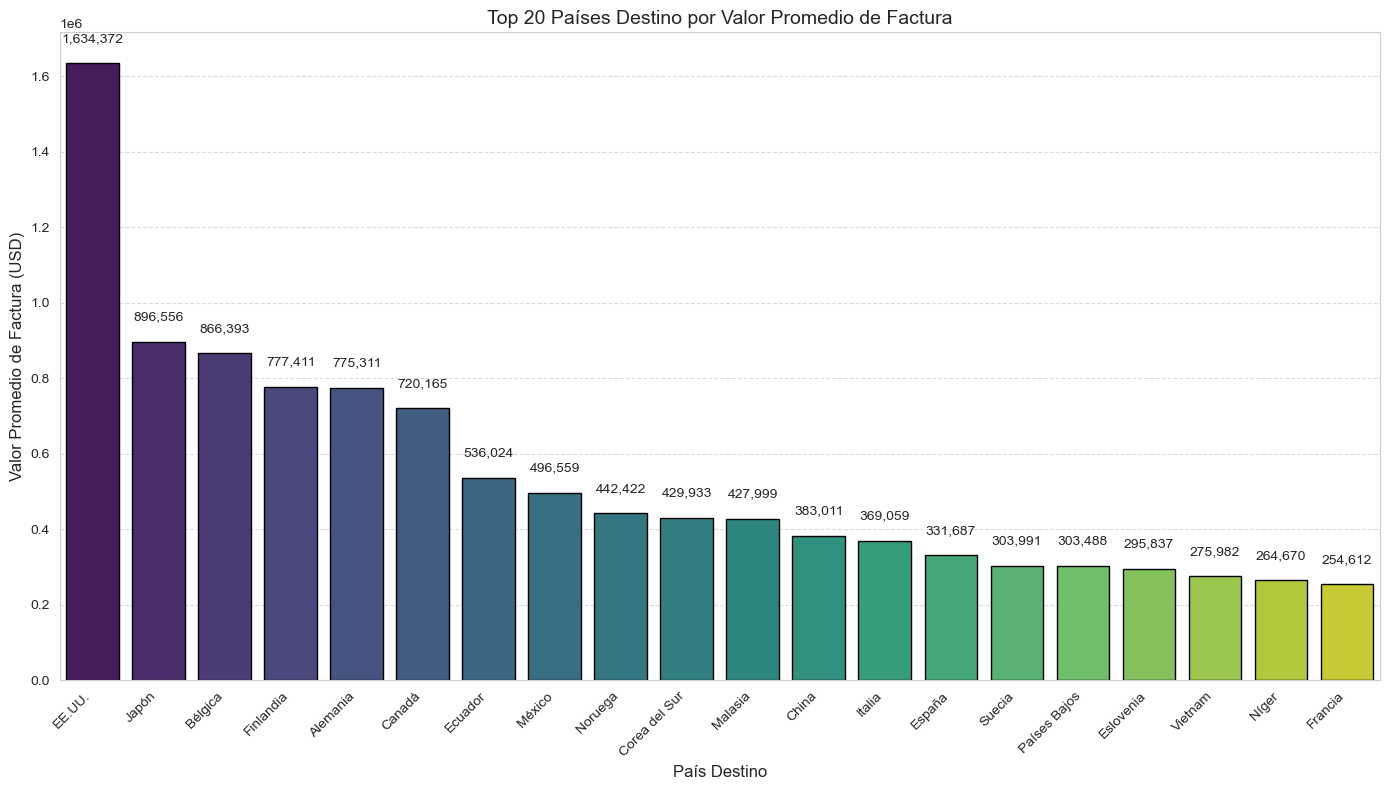

In [99]:
try:
    # Carga del DataFrame
    df = pd.read_excel("CafeDataset.xlsx")

    # Verifica si las columnas existen
    if not all(col in df.columns for col in ['País destino', 'Valor Factura (USD)*']):
        raise ValueError("Las columnas 'País destino' o 'Valor Factura (USD)*' no existen.")

    # Calcula la media del valor de la factura por país
    media_por_pais = df.groupby('País destino')['Valor Factura (USD)*'].mean()

    # Ordena los datos y selecciona el top 20
    top_20_paises = media_por_pais.sort_values(ascending=False).head(20)

    # Crea la gráfica de barras vertical
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")
    sns.barplot(x=top_20_paises.index, y=top_20_paises.values, palette='viridis', edgecolor='black', linewidth=1)

    plt.xlabel('País Destino', fontsize=12)
    plt.ylabel('Valor Promedio de Factura (USD)', fontsize=12)
    plt.title('Top 20 Países Destino por Valor Promedio de Factura', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rota las etiquetas del eje x
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Grilla solo en el eje y
    plt.tight_layout()

    # Agrega etiquetas de valor encima de cada barra
    for i, v in enumerate(top_20_paises.values):
        plt.text(i, v + (max(top_20_paises.values) * 0.03), f'{v:,.0f}', ha='center', va='bottom', fontsize=10)

    plt.show()

except FileNotFoundError:
    print("Error: No se encontró el archivo 'CafeDataset.xlsx'.")
except ValueError as e:
    print(f"Error de valor: {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

In [53]:
minimos = descripcion_estadistica.loc['min', :]
print("Valores minimos:\n", minimos)

Valores minimos:
 Año                                            2017.0
Mes                                               1.0
Sacos de 70 kg. equivalente real Exportados       0.0
Sacos de 60 Kg. Exportados                        0.0
Valor Factura (USD)*                              0.0
Name: min, dtype: float64


C:\Users\ORICO\AppData\Local\Temp\ipykernel_11996\207366151.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_paises.values, y=top_20_paises.index, palette='Blues_r', edgecolor='black', linewidth=1) #Paleta de colores invertida para mejor contraste.


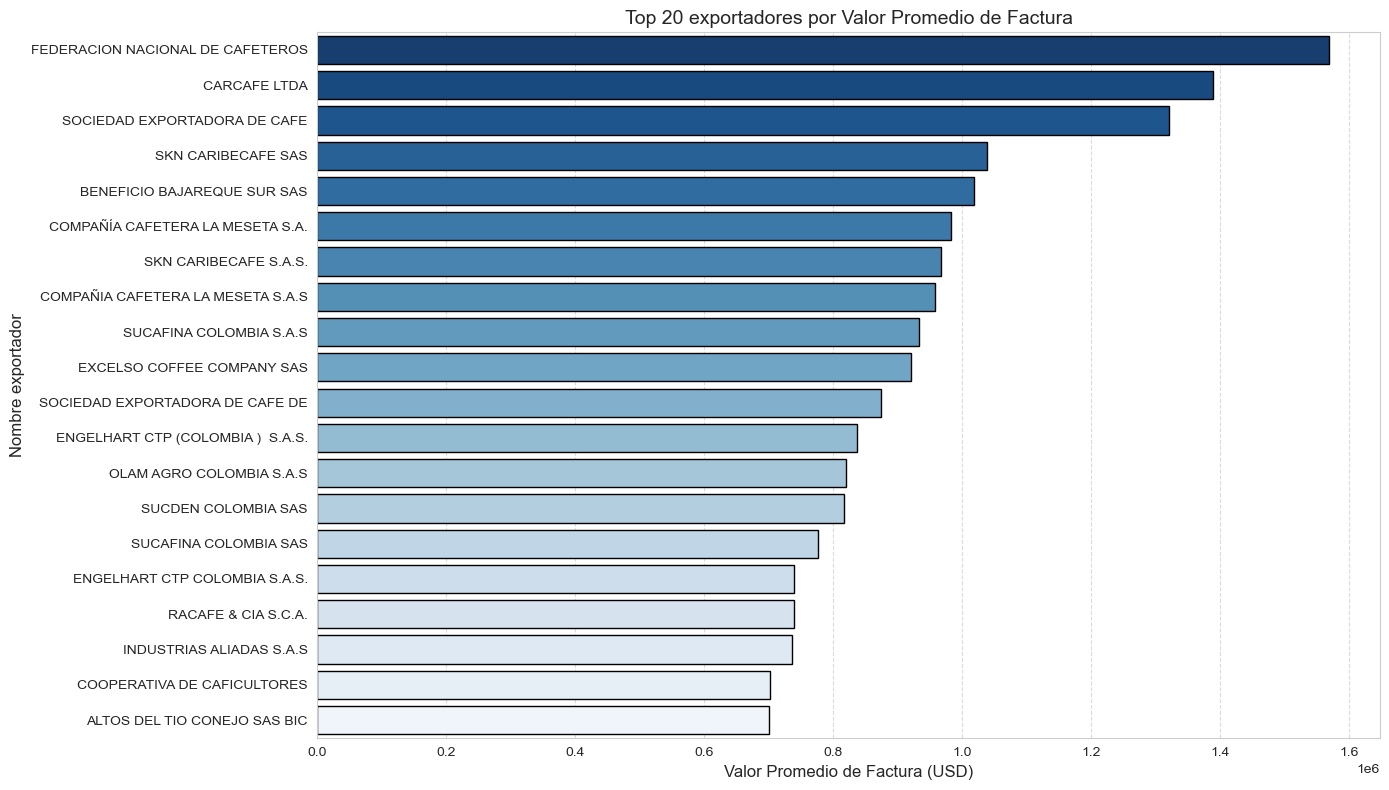

In [101]:
try:
    # Carga del DataFrame
    df = pd.read_excel("CafeDataset.xlsx")

    # Verifica si la columna existe
    if not all(col in df.columns for col in ['Nombre exportador', 'Valor Factura (USD)*']):
        raise ValueError("Las columnas 'Nombre exportador' o 'Valor Factura (USD)*' no existen.")

    # Calcula la media del valor de la factura por país
    media_por_pais = df.groupby('Nombre exportador')['Valor Factura (USD)*'].mean()

    # Ordena los datos y selecciona el top 20
    top_20_paises = media_por_pais.sort_values(ascending=False).head(20)

    # Crea la gráfica de barras horizontal
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")
    sns.barplot(x=top_20_paises.values, y=top_20_paises.index, palette='Blues_r', edgecolor='black', linewidth=1) #Paleta de colores invertida para mejor contraste.

    plt.xlabel('Valor Promedio de Factura (USD)', fontsize=12)
    plt.ylabel('Nombre exportador', fontsize=12)
    plt.title('Top 20 exportadores por Valor Promedio de Factura', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=10)
    plt.tight_layout()
    plt.show()


except FileNotFoundError:
    print("Error: No se encontró el archivo 'CafeDataset.xlsx'.")
except ValueError as e:
    print(f"Error de valor: {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

C:\Users\ORICO\AppData\Local\Temp\ipykernel_11996\2957940756.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_paises.index, y=top_20_paises.values, palette='viridis', edgecolor='black', linewidth=1)


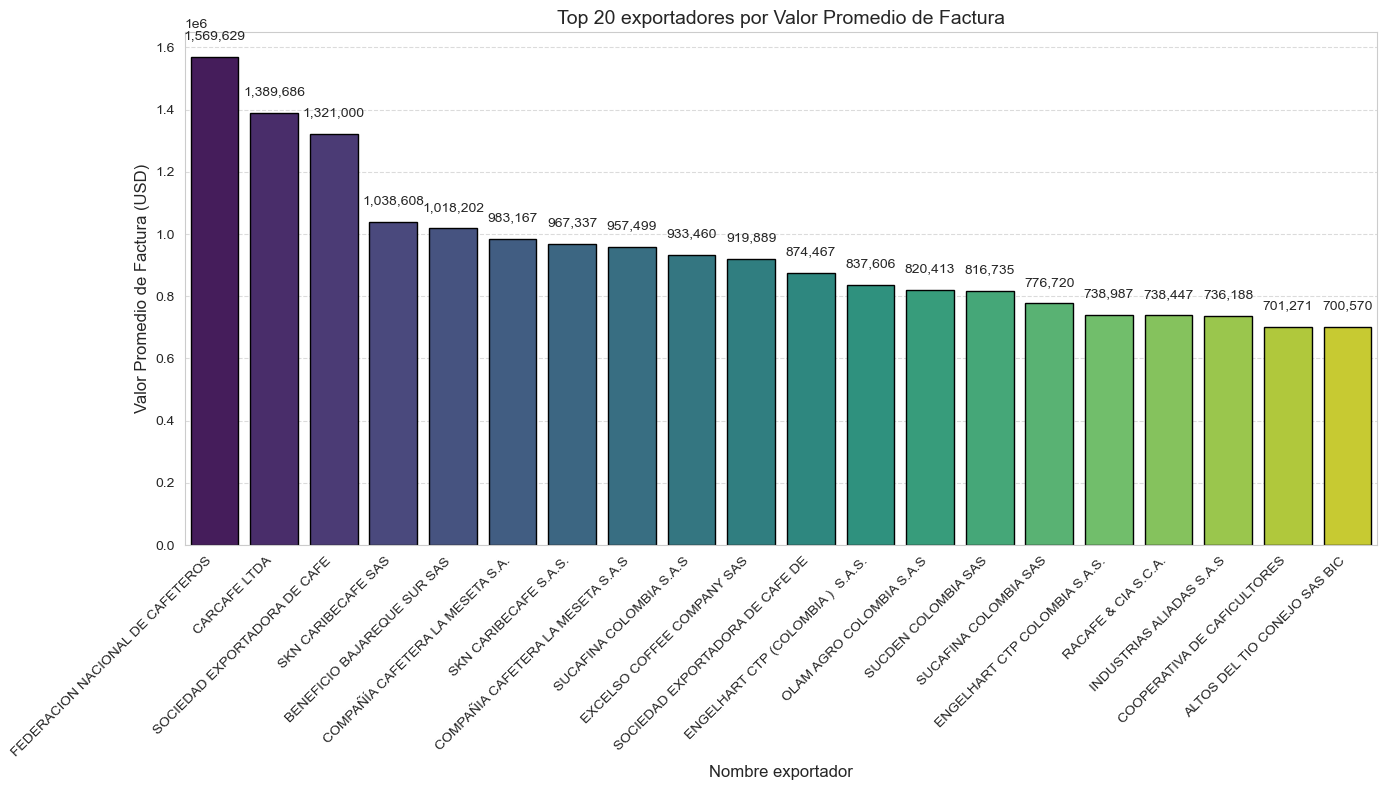

In [107]:
try:
    # Carga del DataFrame
    df = pd.read_excel("CafeDataset.xlsx")

    # Verifica si las columnas existen
    if not all(col in df.columns for col in ['Nombre exportador', 'Valor Factura (USD)*']):
        raise ValueError("Las columnas 'País destino' o 'Valor Factura (USD)*' no existen.")

    # Calcula la media del valor de la factura por país
    media_por_pais = df.groupby('Nombre exportador')['Valor Factura (USD)*'].mean()

    # Ordena los datos y selecciona el top 20
    top_20_paises = media_por_pais.sort_values(ascending=False).head(20)

    # Crea la gráfica de barras vertical
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")
    sns.barplot(x=top_20_paises.index, y=top_20_paises.values, palette='viridis', edgecolor='black', linewidth=1)

    plt.xlabel('Nombre exportador', fontsize=12)
    plt.ylabel('Valor Promedio de Factura (USD)', fontsize=12)
    plt.title('Top 20 exportadores por Valor Promedio de Factura', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rota las etiquetas del eje x
    plt.grid(axis='y', linestyle='--', alpha=0.7) # Grilla solo en el eje y
    plt.tight_layout()

    # Agrega etiquetas de valor encima de cada barra
    for i, v in enumerate(top_20_paises.values):
        plt.text(i, v + (max(top_20_paises.values) * 0.03), f'{v:,.0f}', ha='center', va='bottom', fontsize=10)

    plt.show()

except FileNotFoundError:
    print("Error: No se encontró el archivo 'CafeDataset.xlsx'.")
except ValueError as e:
    print(f"Error de valor: {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

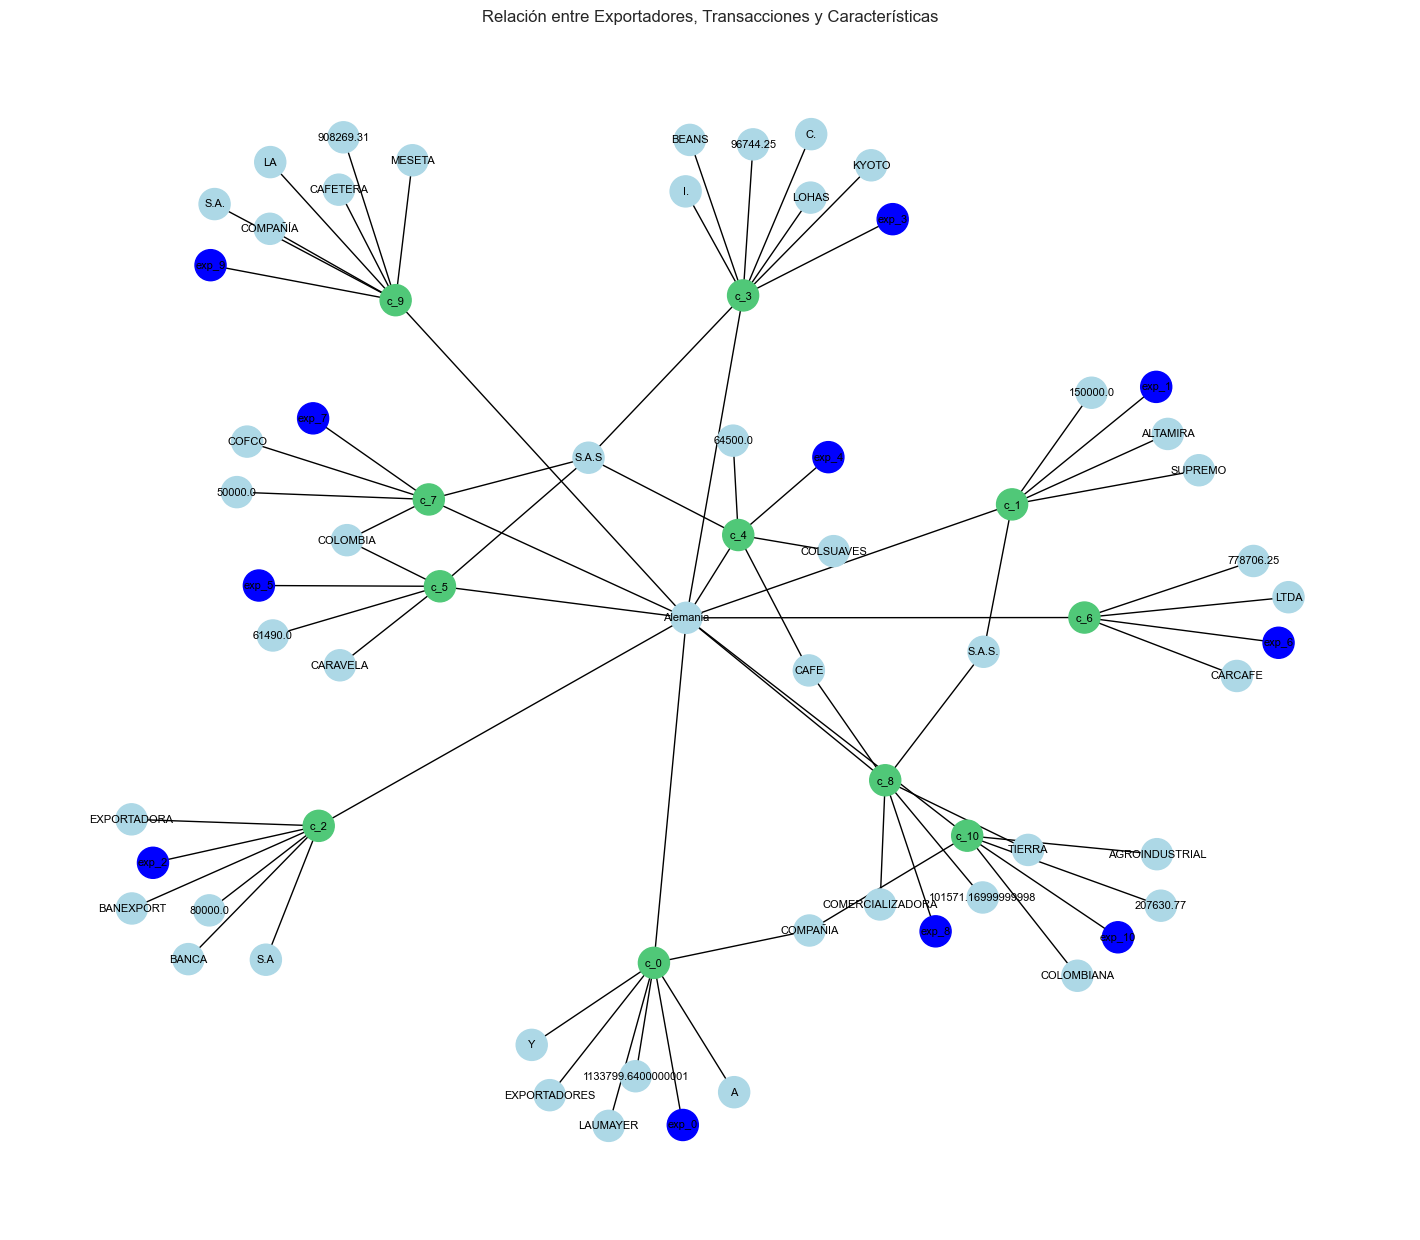

In [109]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

try:
    df = pd.read_excel("CafeDataset.xlsx")

    # Crea una columna de comentarios ficticios basada en otras columnas
    df['Comment_preprocessed'] = df['País destino'] + ' ' + df['Nombre exportador'] + ' ' + df['Valor Factura (USD)*'].astype(str)


    # Crea el grafo
    G = nx.Graph()
    for idx, row in df.iterrows():
        if idx > 10:  # Limita el número de nodos para la visualización (opcional)
            break
        user = f"exp_{idx}" #Ejemplo de usuario, debe adaptarse al dataset real.
        comment = f"c_{idx}"
        words = row['Comment_preprocessed'].split()

        G.add_node(user, type='user')
        G.add_node(comment, type='comment')
        G.add_edge(user, comment)

        for word in words:
            if not G.has_node(word):
                G.add_node(word, type='keyword')
            G.add_edge(comment, word)

    # Colores para los nodos
    node_colors = [
        'blue' if G.nodes[node]['type'] == 'user' else
        '#50C878' if G.nodes[node]['type'] == 'comment' else
        'lightblue' for node in G.nodes
    ]

    # Dibuja el grafo
    plt.figure(figsize=(14, 12))
    pos = nx.spring_layout(G, seed=123)
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_size=8, node_size=500)
    plt.title('Relación entre Exportadores, Transacciones y Características')
    plt.show()

except FileNotFoundError:
    print("Error: No se encontró el archivo 'CafeDataset.xlsx'.")
except KeyError as e:
    print(f"Error: La columna '{e}' no se encuentra en el DataFrame.")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

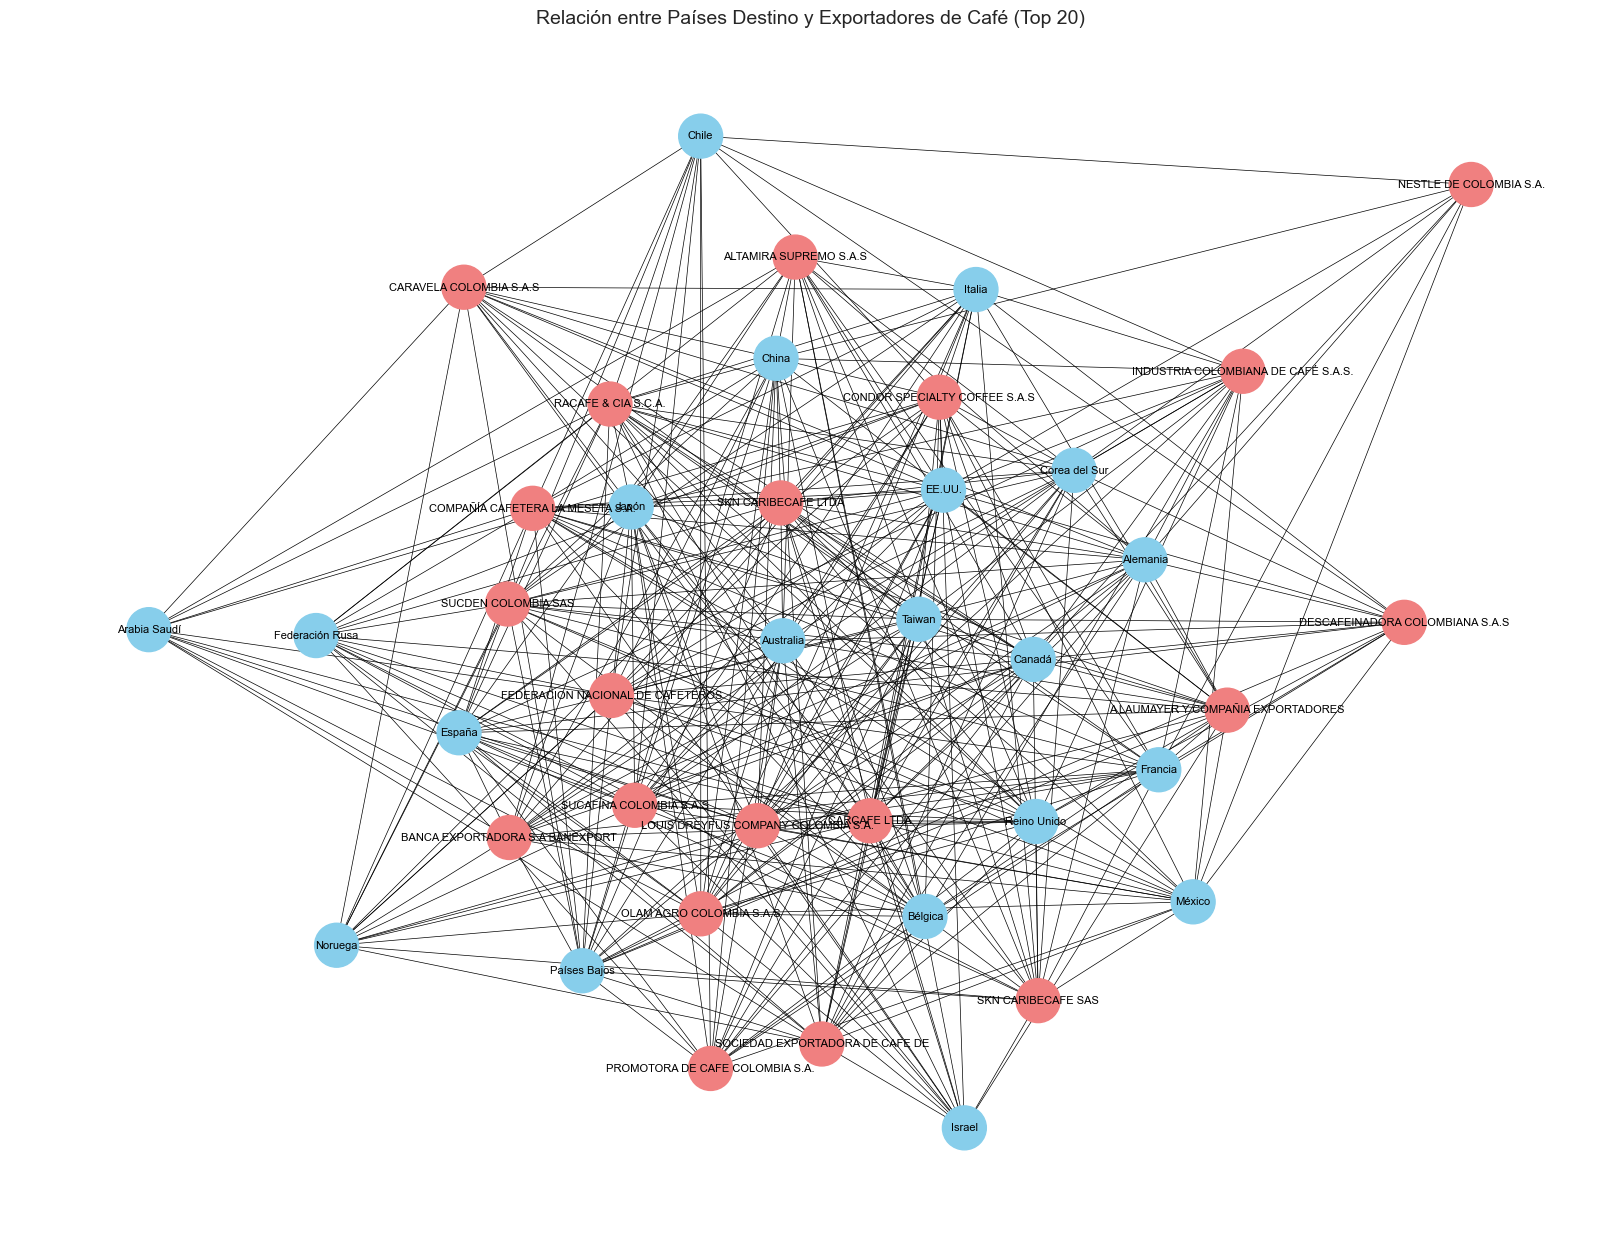

In [111]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

try:
    # Carga del DataFrame
    df = pd.read_excel("CafeDataset.xlsx")

    # Verifica si las columnas existen
    if not all(col in df.columns for col in ['País destino', 'Nombre exportador']):
        raise ValueError("Las columnas 'País destino' o 'Nombre exportador' no existen.")

    # Obtiene los 20 países y exportadores más frecuentes
    top_paises = df['País destino'].value_counts().nlargest(20).index
    top_exportadores = df['Nombre exportador'].value_counts().nlargest(20).index

    # Filtra el DataFrame para incluir solo los top países y exportadores
    df_filtrado = df[df['País destino'].isin(top_paises) & df['Nombre exportador'].isin(top_exportadores)]

    # Crea el grafo
    G = nx.Graph()
    for _, row in df_filtrado.iterrows():
        pais = row['País destino']
        exportador = row['Nombre exportador']
        G.add_node(pais, type='country')
        G.add_node(exportador, type='exporter')
        G.add_edge(pais, exportador)

    # Colores para los nodos
    node_colors = ['skyblue' if G.nodes[node]['type'] == 'country' else 'lightcoral' for node in G.nodes]


    # Dibuja el grafo
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, seed=42)  # Usa spring layout para una mejor distribución
    nx.draw(G, pos, with_labels=True, node_color=node_colors, font_size=8, node_size=1000, width=0.5) #Tamaño de nodos aumentado
    plt.title('Relación entre Países Destino y Exportadores de Café (Top 20)', fontsize=14)
    plt.show()

except FileNotFoundError:
    print("Error: No se encontró el archivo 'CafeDataset.xlsx'.")
except ValueError as e:
    print(f"Error de valor: {e}")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

count    41235.000000
mean      2310.018188
std       6105.339754
min          0.000000
25%        303.000000
50%        632.000000
75%       1632.000000
max      94864.000000
Name: Sacos de 60 Kg. Exportados, dtype: float64


C:\Users\ORICO\AppData\Local\Temp\ipykernel_11996\3691347502.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sacos de 60 Kg. Exportados'], color='b', bins=100, hist_kws={'alpha': 0.4});


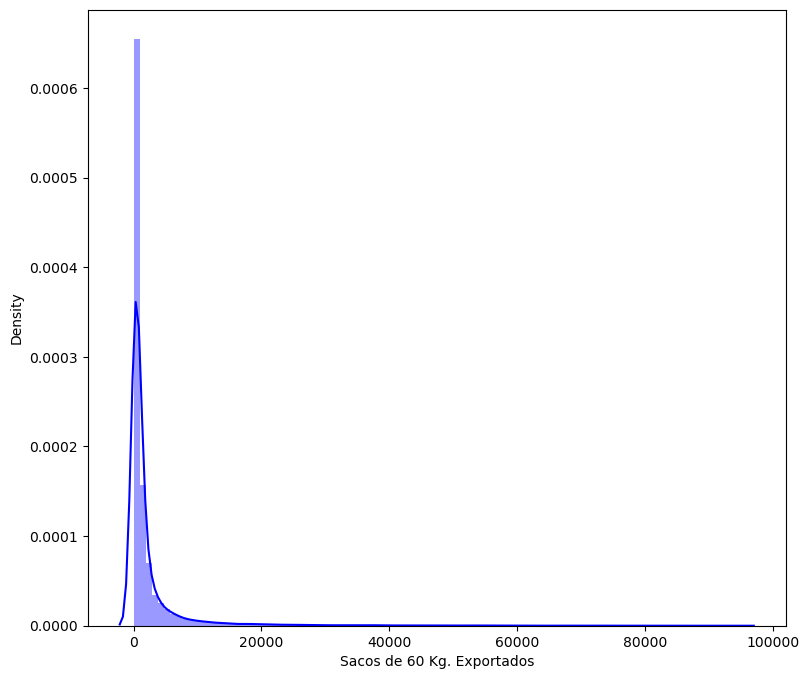

In [29]:
print(df['Sacos de 60 Kg. Exportados'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Sacos de 60 Kg. Exportados'], color='b', bins=100, hist_kws={'alpha': 0.4});

In [31]:
media = df['Valor Factura (USD)*'].mean()
desviacion_estandar = df['Valor Factura (USD)*'].std()

In [33]:
print("Media:", media)
print("Desviación Estándar:", desviacion_estandar)

Media: 550965.3443009241
Desviación Estándar: 1469110.0572623299


In [39]:
prob_menos_1000 = norm.cdf((1000-media)/desviacion_estandar)
print("Probabilida de que los negocios sean menores a 1000 USD:", prob_menos_1000)

Probabilida de que los negocios sean menores a 1000 USD: 0.35407095729863736


In [41]:
prob_menos_50000 = norm.cdf((50000-media)/desviacion_estandar)
print("Probabilida de que los negocios sean menores a 50000 USD:", prob_menos_50000)

Probabilida de que los negocios sean menores a 50000 USD: 0.3665520945423013


In [87]:
prob_menos_100000 = norm.cdf((100000-media)/desviacion_estandar)
print("Probabilida de que los negocios sean menores a 100000 USD:", prob_menos_100000)

Probabilida de que los negocios sean menores a 100000 USD: 0.3794350127542881
